<div align='center'><font size="6" color="#00000"><center><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"> Outlier Analysis </font></div> </h1></center>

  
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>What is an Outlier? </strong> </font></div></h1>
<div align='left'><font size="3" color="#000000"> Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.let’s take an example to check what happens to a data set with and data set without outliers.
</font></div>

|| | Data without outlier |  | Data with outlier |
|--||--||--|
|**Data**| |1,2,3,3,4,5,4 |  |1,2,3,3,4,5,**400** |
|**Mean**| |3.142 | |**59.714** |  
|**Median**| |3|  |3|
|**Standard Deviation**| |1.345185| |**150.057**|





### Outliers and Their Impact on Data

As you can see, a dataset with outliers has significantly different mean and standard deviation. In the first scenario, the average is 3.14, but with the outlier, the average soars to 59.71. This completely changes the estimate.

### Real-World Example

Let’s take a real-world example: In a company with 50 employees, 45 people have a monthly salary of Rs. 6,000, and 5 senior employees have a monthly salary of Rs. 100,000 each. If you calculate the average monthly salary of all employees, it is Rs. 14,500. This gives a misleading conclusion (as most employees earn less than Rs. 14,500). However, if you take the median salary, it is Rs. 6,000, which makes more sense. This example highlights the effect of an outlier and shows why the median is a more appropriate measure than the mean.

---

<div class="alert alert-info">
    <font size="3"><strong>Outlier</strong> is a commonly used term by analysts and data scientists, as it requires close attention. If ignored, it can lead to wildly wrong estimations. Simply speaking, an outlier is an observation that appears far away and diverges from an overall pattern in a sample.
</div>

---

## Cause of Outliers

- **Data Entry Errors**: Human errors, such as those occurring during data collection, recording, or entry, can lead to outliers in the data.
- **Measurement Error**: This is one of the most common causes of outliers and happens when the measurement instrument used is faulty.
- **Natural Outliers**: These occur when an outlier is not artificial (due to an error) but a natural phenomenon. Most real-world data belong to this category.

---

## Outlier Detection

Outliers can be classified into two types: Univariate and Multivariate.

- **Univariate Outliers**: These are detected by analyzing the distribution of a single variable.
- **Multivariate Outliers**: These are outliers in an n-dimensional space, which involve the relationship between multiple variables.


<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Different outlier detection technique.</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000"> 1. Hypothesis Testing </font></div>
<div align='left'><font size="3" color="#000000"> 2. Z-score method </font></div>
<div align='left'><font size="3" color="#000000"> 3. Robust Z-score</font></div>
<div align='left'><font size="3" color="#000000"> 4. I.Q.R method </font></div>
<div align='left'><font size="3" color="#000000"> 5. Winsorization method(Percentile Capping) </font></div>
<div align='left'><font size="3" color="#000000"> 6. DBSCAN Clustering</font></div>
<div align='left'><font size="3" color="#000000"> 7. Isolation Forest </font></div>
<div align='left'><font size="3" color="#000000"> 8. Visualizing the data</font></div>
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>1. Hypothesis Testing(grubbs test)</strong> </font></div>
<hr>
$$
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }}  {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{1}} :}  {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
$$
$$
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|X_{i}-\overline{X}\right|}{SD}} \\ {\text { with } \overline{X} \text { and } SD \text { denoting the sample mean and standard deviation, respectively. }} \end{array}
$$
$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$

\begin{array}{l}{\text { If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier }}\end{array}

In [ ]:
# Hypothesis Testing
import numpy as np
import scipy.stats as stats
x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value: 1.4274928542926593
Grubbs Critical Value: 1.8871451177787137
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 2.2765147221587774
Grubbs Critical Value: 2.019968507680656
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



### 2. Z-score method

Using the Z-score method, we can find out how many standard deviations a value is away from the mean.

![Z-Score Diagram](https://i.pinimg.com/originals/cd/14/73/cd1473c4c82980c6596ea9f535a7f41c.jpg)

The figure on the left shows the area under the normal curve and how much area that standard deviation covers.

- 68% of the data points lie between + or - 1 standard deviation.
- 95% of the data points lie between + or - 2 standard deviations.
- 99.7% of the data points lie between + or - 3 standard deviations.

---

### Z-score formula

$$
Z\ \text{score} = \frac{X - \text{Mean}}{\text{Standard Deviation}}
$$

---

If the Z-score of a data point is more than 3 (since it covers 99.7% of the area), it indicates that the data value is quite different from the other values and is considered an outlier.


In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/House price prediction.csv')
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(train['LotArea'])

Outliers: [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


## 3. Robust Z-score

It is also called the Median Absolute Deviation method. It is similar to the Z-score method but with some changes in the parameters. Since mean and standard deviations are heavily influenced by outliers, we use the median and the absolute deviation from the median instead.

<hr>
<div align='left'><font size="3" color="#000000"> Robust Z-score formula </font></div>
<div align='left'><font size="3" color="#000000"> \begin{array}{l} {R.Z.score=\frac{0.6745*( X_{i} - Median)}{MAD}}  \end{array} </font></div>
<div align='center'><font size="2.5" color="#000000"> Where MAD = median(|X-median|)</font></div>
<hr>
Suppose \( x \) follows a standard normal distribution. The MAD will converge to the median of the half-normal distribution, which is the 75% percentile of a normal distribution, and \( N(0.75) \approx 0.6745 \).



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation  # Use this function name

# Load data
train = pd.read_csv('/content/House price prediction.csv')

# Function to detect outliers using modified Z-score
def ZRscore_outlier(df):
    med = np.median(df)
    mad = np.median(np.abs(df - med))  # Manually compute MAD
    outliers = []  # Use local variable to avoid global dependency

    for value in df:
        z = (0.6745 * (value - med)) / mad  # Modified Z-score calculation
        if np.abs(z) > 3:  # Threshold for outlier detection
            outliers.append(value)

    print("Outliers:", outliers)

# Call the function for 'LotArea'
ZRscore_outlier(train['LotArea'])


Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 25286, 27650, 24090, 25000, 21286, 21750, 29959, 23257, 35760, 35133, 32463, 18890, 24682, 23595, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]



## 4. IQR Method

In this method, we detect outliers by using the Interquartile Range (IQR). The IQR tells us the variation in the dataset. Any value that is beyond the range of -1.5 × IQR to 1.5 × IQR is treated as an outlier.

<hr>
<img style="float: center;"  src=" https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400px">
<hr>

- **Q1** represents the 1st quartile / 25th percentile of the data.
- **Q2** represents the 2nd quartile / median / 50th percentile of the data.
- **Q3** represents the 3rd quartile / 75th percentile of the data.
- **(Q1 - 1.5 * IQR)** represents the smallest value in the dataset, and **(Q3 + 1.5 * IQR)** represents the largest value in the dataset.


In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/House price prediction.csv')
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(train['LotArea'])

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


## 5. Winsorization Method (Percentile Capping)

This method is similar to the IQR method. If a value exceeds the value of the 99th percentile or is below the 1st percentile of given values, it is treated as an outlier.


In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/titanic dataset.csv')
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(train['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


## 6. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that divides a dataset into subgroups of high-density regions and identifies high-density regions as outliers. Here, cluster -1 indicates that the cluster contains outliers, while the rest of the clusters have no outliers. This approach is similar to K-means clustering. There are two parameters required for DBSCAN. DBSCAN gives the best results for multivariate outlier detection.

---

1. **epsilon**: A distance parameter that defines the radius to search for nearby neighbors.
2. **minimum amount of points** required to form a cluster.


Using epsilon and minPts, we can classify each data point as:

- **Core point**: A point that has at least a minimum number of other points (minPts) within its radius.
- **Border point**: A point within the radius of a core point but has fewer than the minimum number of other points (minPts) within its own radius.
- **Noise point**: A point that is neither a core point nor a border point.


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
train = pd.read_csv("/content/titanic dataset.csv")
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
DB_outliers(train['Fare'])

cluster
 0     705
 2      50
 4      36
-1      32
 6      15
 1      12
 7       8
 5       7
 8       7
 9       7
 3       6
 10      6
Name: count, dtype: int64


## 7. Isolation Forest

It is a clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest.

<hr>
<img style="float: center;"  src="https://miro.medium.com/max/875/0*0GuMixLdSZo3V3Nh." width="450px">
<hr>       


1. It classifies the data points as outliers or not outliers and works great with very high-dimensional data.

---

2. It works based on decision trees and isolates the outliers.

---

3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.



In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

# Load the dataset
train = pd.read_csv('/content/titanic dataset.csv')

# Handle missing values in 'Fare' with updated chaining syntax
train.loc[:, 'Fare'] = train.loc[:, 'Fare'].fillna(train.loc[train['Pclass'] == 3, 'Fare'].median())

# Function to detect outliers using Isolation Forest
def Iso_outliers(df):
    iso = IsolationForest(random_state=1, contamination='auto')  # Updated parameters

    # Reshape for single-feature input
    df_reshaped = df.values.reshape(-1, 1)

    # Fit and predict outlier clusters
    preds = iso.fit_predict(df_reshaped)

    # Create a DataFrame to store predictions
    data = pd.DataFrame({'Fare': df, 'cluster': preds})

    # Print the count of normal and outlier points
    print(data['cluster'].value_counts().sort_values(ascending=False))

    # Optional: Display outlier values
    print("\nOutliers:")
    print(data[data['cluster'] == -1])

# Call the function for 'Fare'
Iso_outliers(train['Fare'])


cluster
 1    706
-1    185
Name: count, dtype: int64

Outliers:
         Fare  cluster
1     71.2833       -1
3     53.1000       -1
27   263.0000       -1
31   146.5208       -1
34    82.1708       -1
..        ...      ...
856  164.8667       -1
863   69.5500       -1
867   50.4958       -1
872    5.0000       -1
879   83.1583       -1

[185 rows x 2 columns]


## 8. Visualizing the Data

Data visualization is useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters, etc. Here is a list of data visualization plots to spot the outliers.

---

1. Box and whisker plot (box plot)
2. Scatter plot
3. Histogram
4. Distribution plot
5. QQ plot


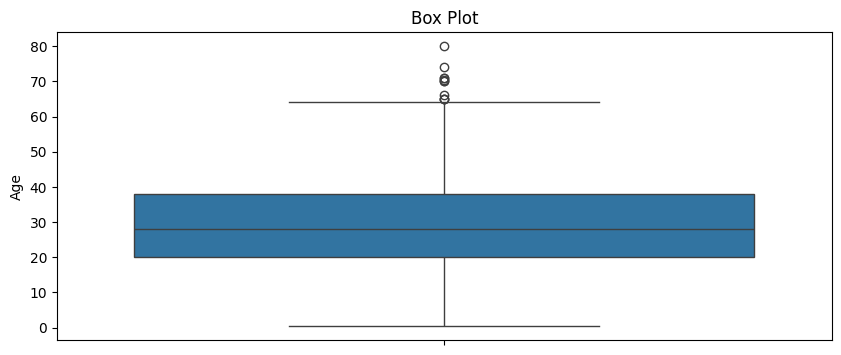

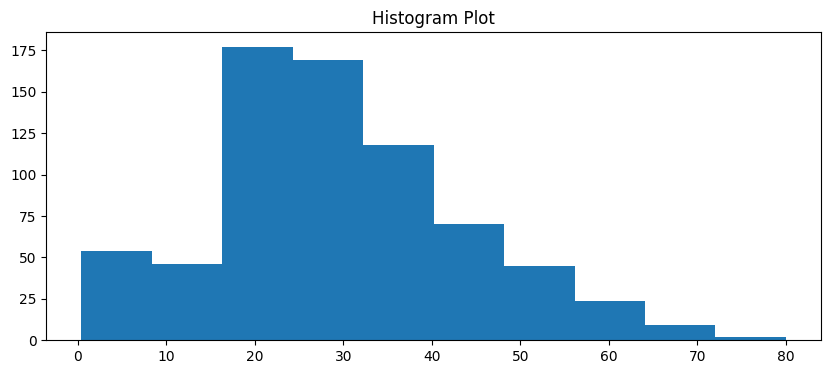

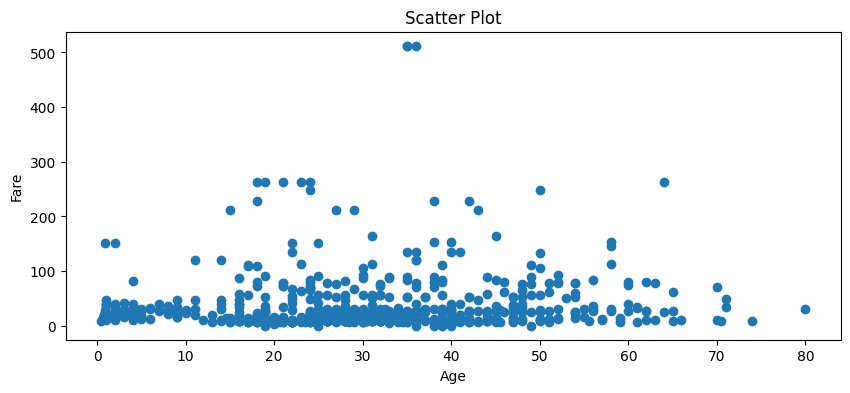

<ipython-input-98-14880bedcd10>:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


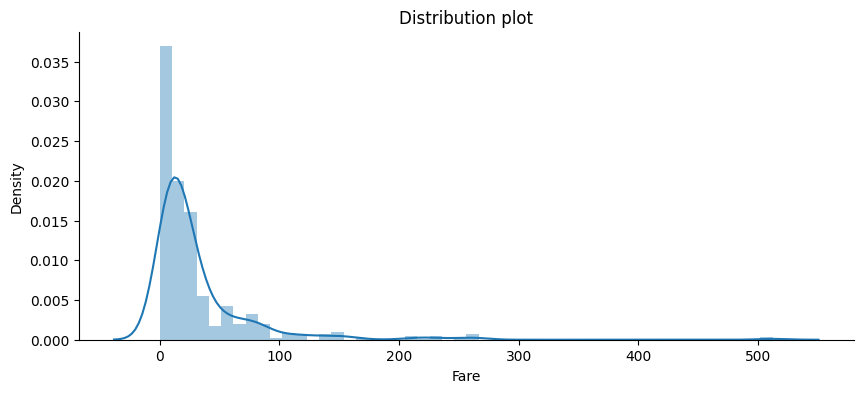

<Figure size 1000x400 with 0 Axes>

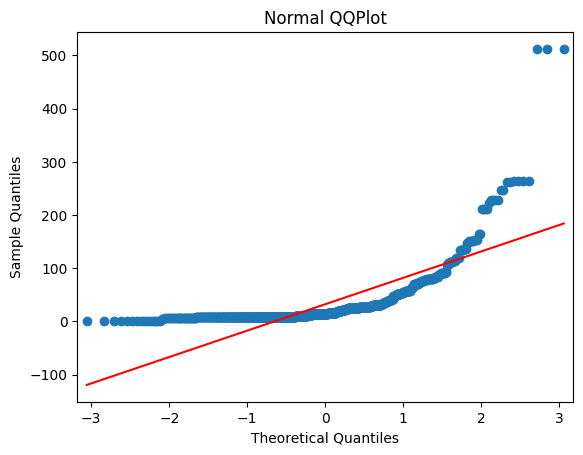

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
train = pd.read_csv('/content/titanic dataset.csv')
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(train['Age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(train['Age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(train['Age'],train['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(train['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(train['Fare'])



# What Next??

After detecting the outlier, we should remove or treat the outlier.

---

- **Outliers** badly affect the mean and standard deviation of the dataset, which may lead to erroneous statistical results.
- They increase the error variance and reduce the power of statistical tests.
- If the outliers are non-randomly distributed, they can decrease normality.
- Most machine learning algorithms do not work well in the presence of outliers, so it is desirable to detect and remove them.
- Outliers can also impact the basic assumptions of regression, ANOVA, and other statistical models.

---

With all these reasons, we must be careful about outliers and treat them before building a statistical or machine learning model. There are several techniques used to deal with outliers:

1. Deleting observations
2. Transforming values
3. Imputation
4. Separately treating outliers

---

## Deleting Observations

We delete outlier values if they are due to data entry errors, data processing errors, or if the outlier observations are very few in number. We can also use trimming at both ends to remove outliers. However, deleting observations is not a good idea when dealing with a small dataset.


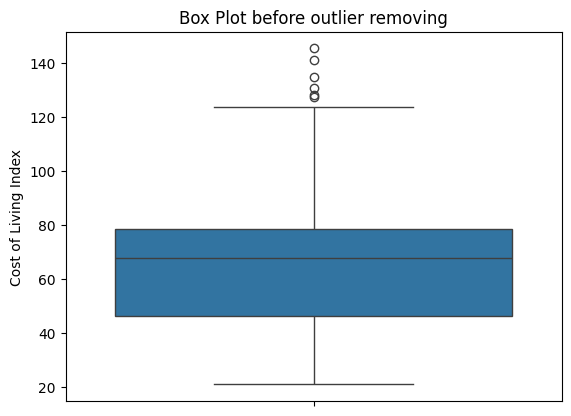

46.08 78.4625
iqr 48.57375000000001


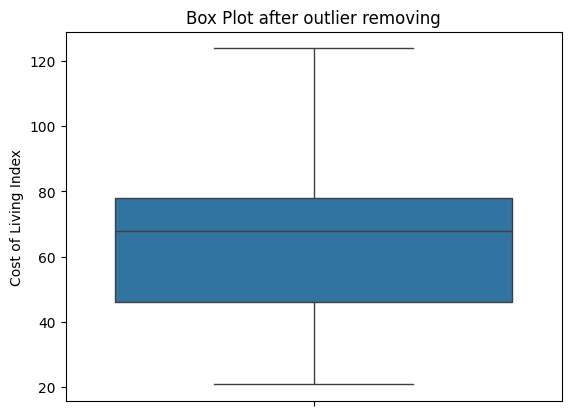

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('/content/cost-of-living-2018.csv')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
#     iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))

    q3=(np.percentile(df[field_name],75))
    q1=(np.percentile(df[field_name],25))

    iqr= 1.5 * (q3 - q1)

    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

    print(q1,q3)
    print('iqr',iqr)
drop_outliers(train, 'Cost of Living Index')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot after outlier removing")
plt.show()

## Transforming Values:

Transforming variables can also eliminate outliers. These transformed values reduce the variation caused by extreme values.

---

### Techniques for Transforming Values

1. Scaling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation

---

- These techniques convert values in the dataset to smaller values.
- If the data has too many extreme values or is skewed, these methods help make your data more normal.
- However, these techniques do not always give the best results.
- There is no loss of data when using these methods.
- Among all these methods, the Box-Cox transformation typically gives the best results.

---


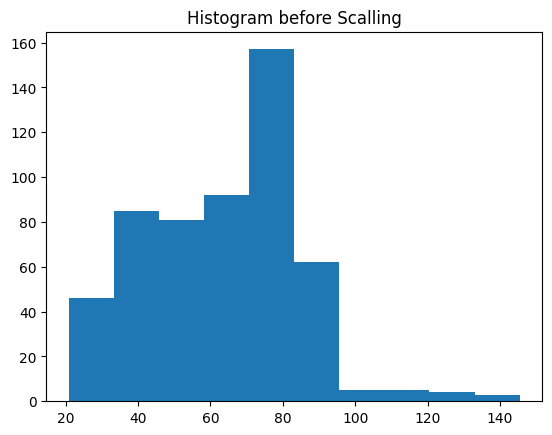

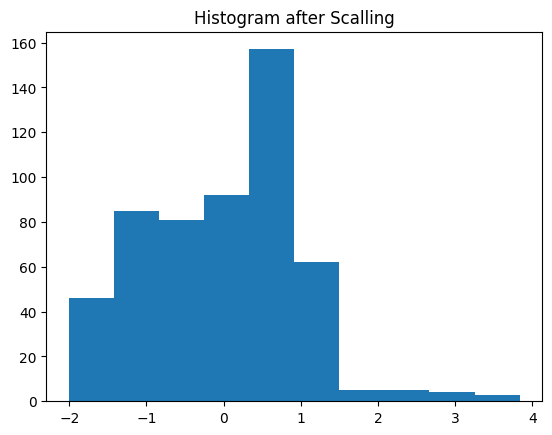

In [ ]:
#Scalling
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
train = pd.read_csv('/content/cost-of-living-2018.csv')
plt.hist(train['Cost of Living Index'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
train['Cost of Living Index'] = scaler.fit_transform(train['Cost of Living Index'].values.reshape(-1,1))
plt.hist(train['Cost of Living Index'])
plt.title("Histogram after Scalling")
plt.show()

<ipython-input-101-0605db80a1d1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Cost of Living Index'])


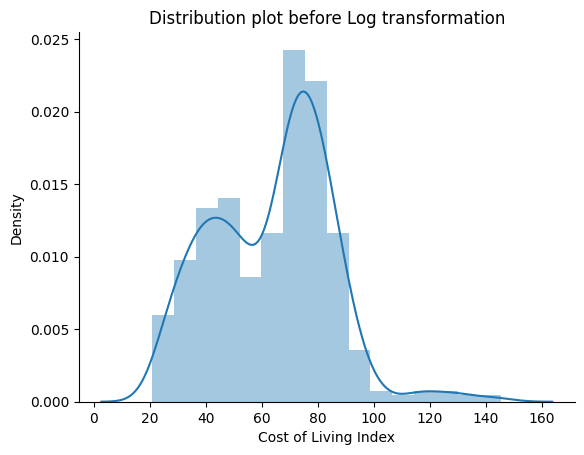

<ipython-input-101-0605db80a1d1>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Cost of Living Index'])


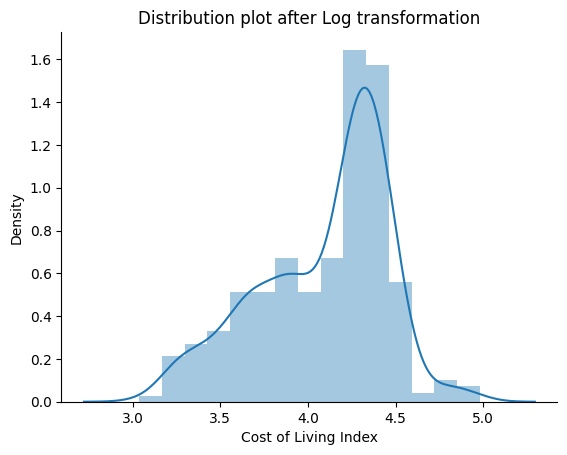

In [ ]:
#Log Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('/content/cost-of-living-2018.csv')
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
train['Cost of Living Index'] = np.log(train['Cost of Living Index'])
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

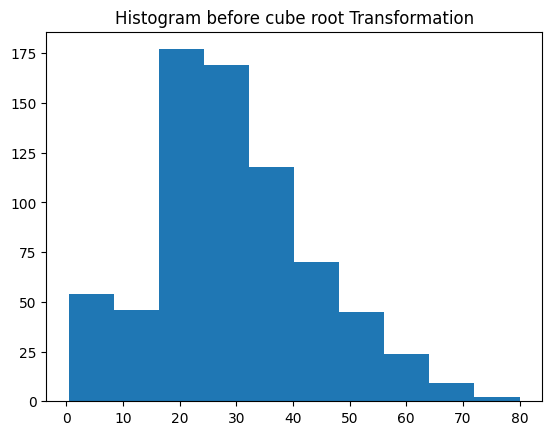

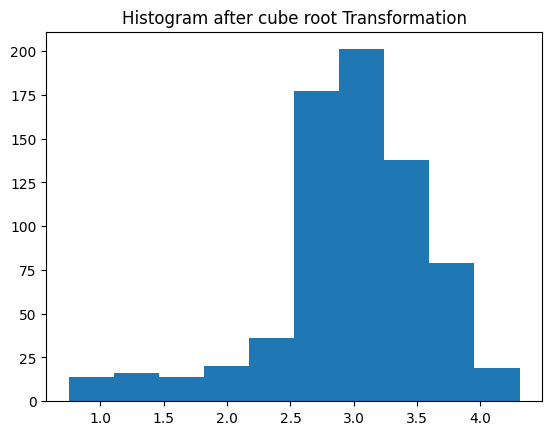

In [ ]:
#cube root Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('/content/titanic dataset.csv')
plt.hist(train['Age'])
plt.title("Histogram before cube root Transformation")
plt.show()
train['Age'] = (train['Age']**(1/3))
plt.hist(train['Age'])
plt.title("Histogram after cube root Transformation")
plt.show()

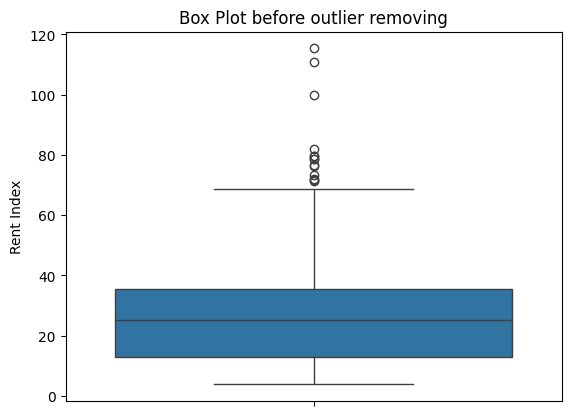

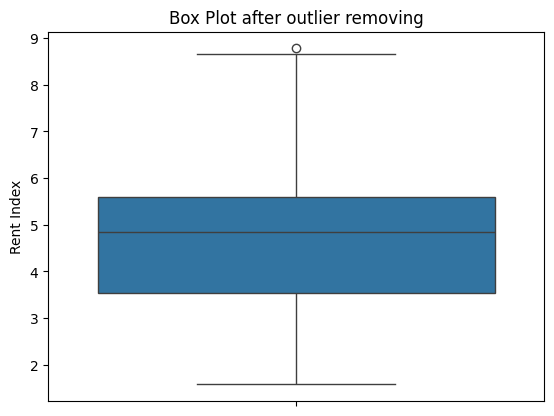

In [ ]:
#Box-transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
train = pd.read_csv('/content/cost-of-living-2018.csv')
sns.boxplot(train['Rent Index'])
plt.title("Box Plot before outlier removing")
plt.show()
train['Rent Index'],fitted_lambda= scipy.stats.boxcox(train['Rent Index'] ,lmbda=None)
sns.boxplot(train['Rent Index'])
plt.title("Box Plot after outlier removing")
plt.show()

## Imputation

Like imputation of missing values, we can also impute outliers. We can use methods such as mean, median, or zero value for imputation. Since we are imputing, there is no loss of data. Among these methods, median is most appropriate because it is not affected by outliers.


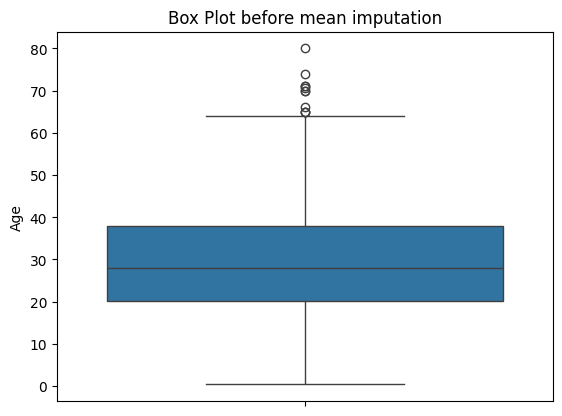

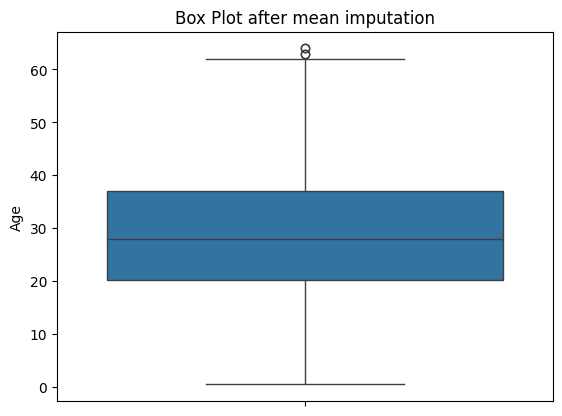

In [ ]:
#mean imputation
import pandas as pd
import numpy as np
train = pd.read_csv('/content/titanic dataset.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, m)
sns.boxplot(train['Age'])
plt.title("Box Plot after mean imputation")
plt.show()

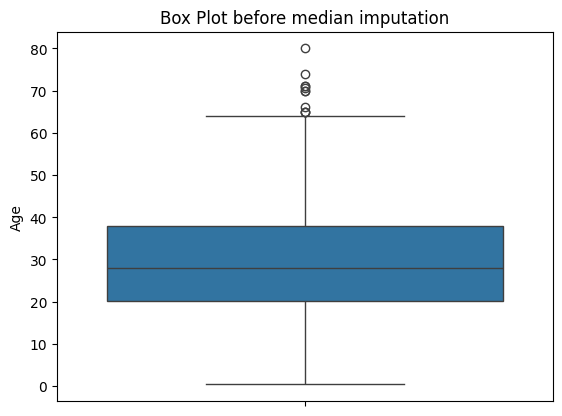

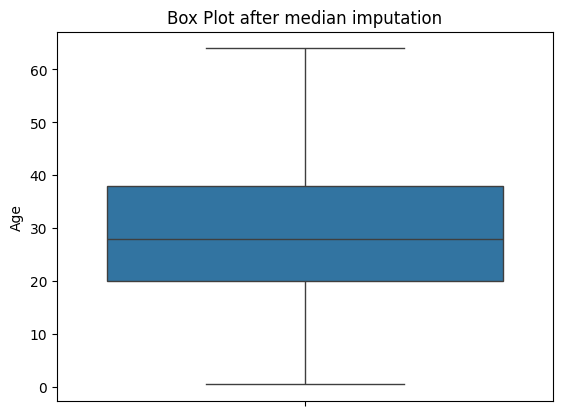

In [ ]:
#median imputation
import pandas as pd
import numpy as np
train = pd.read_csv('/content/titanic dataset.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, med)
sns.boxplot(train['Age'])
plt.title("Box Plot after median imputation")
plt.show()


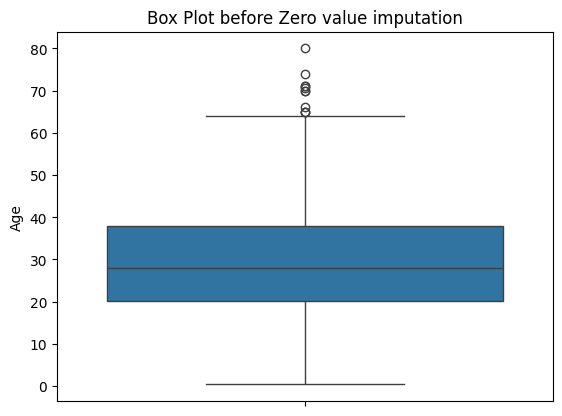

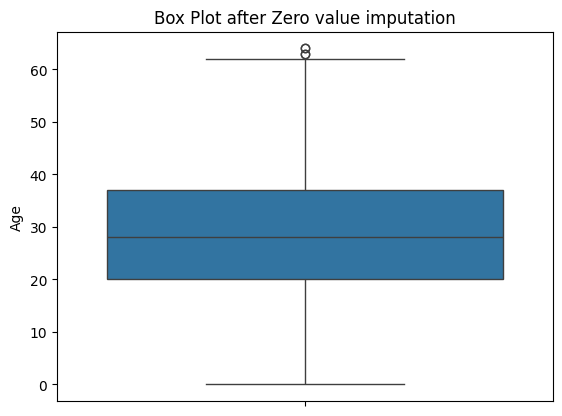

In [ ]:
#Zero value imputation
import pandas as pd
import numpy as np
train = pd.read_csv('/content/titanic dataset.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, 0)
sns.boxplot(train['Age'])
plt.title("Box Plot after Zero value imputation")
plt.show()


## Separately Treating

If there are a significant number of outliers and the dataset is small, we should treat them separately in the statistical model. One approach is to treat both groups as two different groups, build individual models for each, and then combine the output. However, this technique can be tedious when the dataset is large.

---

## Conclusion

1. Median is the best measure of central tendency when the data has outliers or is skewed.
2. Winsorization method or percentile capping is the better outlier detection technique compared to others.
3. Median imputation completely removes outliers.

---

Outliers are one of the major problems in machine learning. If you neglect the outliers, the result will be poor performance of the model. In this kernel, I’ve tried to cover almost all the topics related to outliers, outlier detection, and outlier treatment techniques.
